In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os.path
from pathlib import Path
import tensorflow as tf
from sklearn.model_selection import train_test_split
import natsort
import json
from matplotlib import pyplot as plt
import cv2
from tensorflow.python.client import device_lib
tf.__version__



'2.9.1'

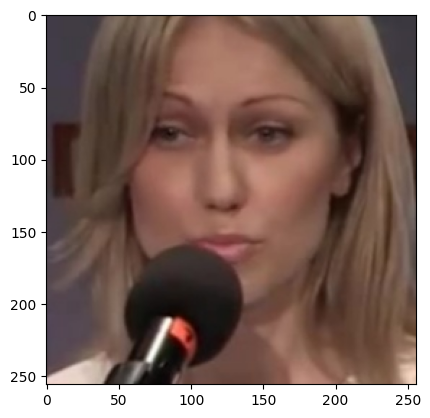

26.14930227523672


In [2]:
im = cv2.imread(f"C:/Users/67160_m3548ob/Documents/TF/dataset3/dataset3/train/300vw/cropped/0_000001.jpg")
f = open(f"C:/Users/67160_m3548ob/Documents/TF/dataset3/dataset3/train/300vw/cropped/0_000001.json",'r')
js = json.loads(f.readline())

plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.show()
print(js[0][0] / 2)

In [2]:
folders = ['300vw','300W-LP','celeb']

In [3]:
totlist = []
for foldername in folders:
    dataset_dir = f'dataset3/dataset3/train/{foldername}/cropped'
    imagelist = natsort.natsorted(os.listdir(dataset_dir))
    if imagelist.__contains__("desktop.ini"):
        imagelist.remove("desktop.ini")
    n = len(imagelist)
    for i in range(n):
        if(imagelist[i].endswith('.json')):
            continue
        totlist.append(dataset_dir + '/' + imagelist[i])
        #imagelist[i] = dataset_dir + '/' + imagelist[i]
filepaths = pd.Series(list(totlist),name='Filepath').astype(str)

In [4]:
filepaths

0         dataset3/dataset3/train/300vw/cropped/0_000001...
1         dataset3/dataset3/train/300vw/cropped/2_000003...
2         dataset3/dataset3/train/300vw/cropped/3_000004...
3         dataset3/dataset3/train/300vw/cropped/4_000005...
4         dataset3/dataset3/train/300vw/cropped/5_000006...
                                ...                        
394576    dataset3/dataset3/train/celeb/cropped/198562_2...
394577    dataset3/dataset3/train/celeb/cropped/198563_2...
394578    dataset3/dataset3/train/celeb/cropped/198564_2...
394579    dataset3/dataset3/train/celeb/cropped/198565_2...
394580    dataset3/dataset3/train/celeb/cropped/198567_2...
Name: Filepath, Length: 394581, dtype: object

In [11]:



#image_dir = Path('Data/Images/DataProcessed')
#landmark_dir = Path('Data/landmarks/DataProcessed')

In [12]:

#dirpath = f"C:/Users/67160_m3548ob/Documents/TF/Data/Images/DataProcessed"
#imagelist = natsort.natsorted(os.listdir(dirpath))

#n = len(imagelist)
#for i in range(n):
#    imagelist[i] = dirpath + '/' + imagelist[i]

#filepaths = pd.Series(list(imagelist),name='Filepath').astype(str)

In [13]:
#filepaths

In [5]:
index = 68

In [6]:
import os
landmarkData = []
for foldername in folders:
    dataset_dir = f'dataset3/dataset3/train/{foldername}/cropped'
    datalist = natsort.natsorted(os.listdir(dataset_dir))
    if datalist.__contains__("desktop.ini"):
        datalist.remove("desktop.ini")
    for data in datalist:
        if(data.endswith('.json')):
            f = open(dataset_dir + '/' + data,'r')
            landmarkData.append(json.loads(f.readline()))
            f.close()

len(landmarkData)

394581

In [6]:
#import os
#dirpath = f"C:/Users/67160_m3548ob/Documents/TF/Data/landmarks/DataProcessed"
#datalist = natsort.natsorted(os.listdir(dirpath))

#if datalist.__contains__("desktop.ini"):
#    datalist.remove("desktop.ini")

#landmarkData = []
#indexList = [] 

In [7]:
#for data in datalist:
#    f = open(dirpath+'/'+data,'r')
#    pointData = []
#    for i in range(68):
#        point = f.readline().split(',')
#        x = float(point[0])
#        y = float(point[1])
#        pointData.append(x)
#        pointData.append(y)
#    landmarkData.append(pointData)
#    f.close()

In [7]:
landmarkDatacp = landmarkData.copy()


n = 0
for lmdata in landmarkDatacp:
    trueLD = []
    for i in range(68):
        trueLD.append(lmdata[i][0] / 256)
        trueLD.append(lmdata[i][1] / 256)
    landmarkDatacp[n] = trueLD
    n += 1

In [8]:
landmarkDatacp[0]

[0.20429142402528688,
 0.3413473234726698,
 0.21024543115344377,
 0.4189735016205048,
 0.2263455736037394,
 0.49410732958028947,
 0.24912908384430146,
 0.5682214818642408,
 0.2809583976661838,
 0.6342090205475654,
 0.3273318768150622,
 0.6923691160640599,
 0.38239091546132253,
 0.7398659953770452,
 0.4429632171199438,
 0.7778672388602818,
 0.5089207661227134,
 0.7905839976131201,
 0.5789382207738643,
 0.7789937787154012,
 0.645135757986267,
 0.7363007179364652,
 0.7029216905848545,
 0.6809294566388738,
 0.7465646243284719,
 0.6145318130583517,
 0.7713058487087011,
 0.538501609743043,
 0.7841608385683153,
 0.45997092204855067,
 0.7918593853591748,
 0.379464080842503,
 0.7910119517951502,
 0.298315751340126,
 0.24161162183113108,
 0.24905026525712431,
 0.27637918964432695,
 0.223031577746224,
 0.32164647480441244,
 0.21793593730104874,
 0.36828655640564395,
 0.22801117125160897,
 0.4116401542254225,
 0.24847233181540154,
 0.5178369280821573,
 0.24669063111958728,
 0.5660508595942039,
 0.

In [9]:
ld = pd.Series(list(landmarkDatacp),name = "landmarkPositions")
ld = pd.DataFrame(ld)
cols = []
for i in range(68):
    cols.append('x'+str(i))
    cols.append('y'+str(i))
cols
ld2 = pd.DataFrame(ld["landmarkPositions"].to_list(), columns=cols)
ld2


,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
0,0.204291,0.341347,0.210245,0.418974,0.226346,0.494107,0.249129,0.568221,0.280958,0.634209,...,0.509781,0.625547,0.562913,0.627529,0.508752,0.622312,0.484580,0.623582,0.461076,0.620682
1,0.208103,0.340414,0.214797,0.415456,0.231830,0.487960,0.255223,0.559966,0.286180,0.625146,...,0.501122,0.628219,0.559408,0.628535,0.500994,0.623570,0.477233,0.624306,0.454258,0.621116
2,0.209424,0.348845,0.214567,0.421316,0.229838,0.491493,0.251453,0.561721,0.280151,0.625517,...,0.491258,0.628815,0.553607,0.628563,0.491393,0.622988,0.466955,0.623680,0.443633,0.620554
3,0.211477,0.364721,0.214493,0.434605,0.228270,0.502547,0.248921,0.570973,0.275608,0.632284,...,0.475048,0.630484,0.539105,0.632852,0.475132,0.626725,0.450562,0.627322,0.427160,0.624399
4,0.217344,0.369910,0.219247,0.438075,0.232186,0.504777,0.252513,0.571883,0.277653,0.633008,...,0.458606,0.621297,0.527772,0.628153,0.459546,0.626292,0.434194,0.626457,0.410592,0.623137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394576,0.215928,0.292530,0.207352,0.389009,0.213769,0.440572,0.248427,0.557634,0.279927,0.608508,...,0.569381,0.608170,0.630597,0.595289,0.568934,0.608275,0.545326,0.610584,0.518082,0.610109
394577,0.215670,0.286444,0.208175,0.378023,0.210949,0.426395,0.237483,0.536856,0.261796,0.585852,...,0.513094,0.592027,0.588700,0.583009,0.512952,0.593295,0.485717,0.594132,0.459288,0.591835
394578,0.206978,0.295337,0.217187,0.377274,0.224748,0.422026,0.253347,0.521791,0.277500,0.566019,...,0.515602,0.558866,0.616151,0.542823,0.516015,0.581831,0.482128,0.582753,0.450577,0.579164
394579,0.209753,0.292261,0.205975,0.388681,0.208640,0.439385,0.227402,0.554259,0.251482,0.603488,...,0.545341,0.549157,0.625842,0.544771,0.542835,0.581968,0.510657,0.583125,0.477299,0.579173


In [10]:
DS = pd.concat([filepaths,ld2],axis=1).reset_index(drop=True)

In [11]:
DS

,Filepath,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
0,dataset3/dataset3/train/300vw/cropped/0_000001...,0.204291,0.341347,0.210245,0.418974,0.226346,0.494107,0.249129,0.568221,0.280958,...,0.509781,0.625547,0.562913,0.627529,0.508752,0.622312,0.484580,0.623582,0.461076,0.620682
1,dataset3/dataset3/train/300vw/cropped/2_000003...,0.208103,0.340414,0.214797,0.415456,0.231830,0.487960,0.255223,0.559966,0.286180,...,0.501122,0.628219,0.559408,0.628535,0.500994,0.623570,0.477233,0.624306,0.454258,0.621116
2,dataset3/dataset3/train/300vw/cropped/3_000004...,0.209424,0.348845,0.214567,0.421316,0.229838,0.491493,0.251453,0.561721,0.280151,...,0.491258,0.628815,0.553607,0.628563,0.491393,0.622988,0.466955,0.623680,0.443633,0.620554
3,dataset3/dataset3/train/300vw/cropped/4_000005...,0.211477,0.364721,0.214493,0.434605,0.228270,0.502547,0.248921,0.570973,0.275608,...,0.475048,0.630484,0.539105,0.632852,0.475132,0.626725,0.450562,0.627322,0.427160,0.624399
4,dataset3/dataset3/train/300vw/cropped/5_000006...,0.217344,0.369910,0.219247,0.438075,0.232186,0.504777,0.252513,0.571883,0.277653,...,0.458606,0.621297,0.527772,0.628153,0.459546,0.626292,0.434194,0.626457,0.410592,0.623137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394576,dataset3/dataset3/train/celeb/cropped/198562_2...,0.215928,0.292530,0.207352,0.389009,0.213769,0.440572,0.248427,0.557634,0.279927,...,0.569381,0.608170,0.630597,0.595289,0.568934,0.608275,0.545326,0.610584,0.518082,0.610109
394577,dataset3/dataset3/train/celeb/cropped/198563_2...,0.215670,0.286444,0.208175,0.378023,0.210949,0.426395,0.237483,0.536856,0.261796,...,0.513094,0.592027,0.588700,0.583009,0.512952,0.593295,0.485717,0.594132,0.459288,0.591835
394578,dataset3/dataset3/train/celeb/cropped/198564_2...,0.206978,0.295337,0.217187,0.377274,0.224748,0.422026,0.253347,0.521791,0.277500,...,0.515602,0.558866,0.616151,0.542823,0.516015,0.581831,0.482128,0.582753,0.450577,0.579164
394579,dataset3/dataset3/train/celeb/cropped/198565_2...,0.209753,0.292261,0.205975,0.388681,0.208640,0.439385,0.227402,0.554259,0.251482,...,0.545341,0.549157,0.625842,0.544771,0.542835,0.581968,0.510657,0.583125,0.477299,0.579173


In [12]:
#mini_DS = DS.sample(5000,random_state=1).reset_index(drop=True)


In [13]:
#mini_DS

In [52]:
train_df, test_df = train_test_split(DS, train_size=0.8,shuffle=False)

In [53]:
train_df

,Filepath,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
0,dataset3/dataset3/train/300vw/cropped/0_000001...,0.204291,0.341347,0.210245,0.418974,0.226346,0.494107,0.249129,0.568221,0.280958,...,0.509781,0.625547,0.562913,0.627529,0.508752,0.622312,0.484580,0.623582,0.461076,0.620682
1,dataset3/dataset3/train/300vw/cropped/2_000003...,0.208103,0.340414,0.214797,0.415456,0.231830,0.487960,0.255223,0.559966,0.286180,...,0.501122,0.628219,0.559408,0.628535,0.500994,0.623570,0.477233,0.624306,0.454258,0.621116
2,dataset3/dataset3/train/300vw/cropped/3_000004...,0.209424,0.348845,0.214567,0.421316,0.229838,0.491493,0.251453,0.561721,0.280151,...,0.491258,0.628815,0.553607,0.628563,0.491393,0.622988,0.466955,0.623680,0.443633,0.620554
3,dataset3/dataset3/train/300vw/cropped/4_000005...,0.211477,0.364721,0.214493,0.434605,0.228270,0.502547,0.248921,0.570973,0.275608,...,0.475048,0.630484,0.539105,0.632852,0.475132,0.626725,0.450562,0.627322,0.427160,0.624399
4,dataset3/dataset3/train/300vw/cropped/5_000006...,0.217344,0.369910,0.219247,0.438075,0.232186,0.504777,0.252513,0.571883,0.277653,...,0.458606,0.621297,0.527772,0.628153,0.459546,0.626292,0.434194,0.626457,0.410592,0.623137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233420,dataset3/dataset3/train/celeb/cropped/73687_07...,0.217514,0.277095,0.208081,0.369448,0.210943,0.421024,0.237933,0.537354,0.267463,...,0.574009,0.596920,0.634273,0.590641,0.573735,0.594760,0.551893,0.595920,0.525020,0.594050
233421,dataset3/dataset3/train/celeb/cropped/73689_07...,0.202210,0.283806,0.206263,0.385857,0.214318,0.439117,0.244288,0.556898,0.271749,...,0.556737,0.580659,0.629524,0.573224,0.556848,0.582115,0.530240,0.583572,0.501423,0.581197
233422,dataset3/dataset3/train/celeb/cropped/73690_07...,0.209796,0.283248,0.208161,0.384539,0.212582,0.437475,0.235478,0.560402,0.256147,...,0.523703,0.552135,0.631041,0.550676,0.528486,0.605140,0.489630,0.606824,0.451863,0.604057
233423,dataset3/dataset3/train/celeb/cropped/73691_07...,0.243222,0.294789,0.215693,0.399988,0.213892,0.455127,0.242191,0.579850,0.283751,...,0.652515,0.582560,0.694650,0.577947,0.649457,0.621558,0.626687,0.625486,0.590504,0.622770


In [54]:
test_df

,Filepath,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
233425,dataset3/dataset3/train/celeb/cropped/73695_07...,0.212996,0.298556,0.208708,0.394396,0.213742,0.443240,0.239301,0.553843,0.265364,...,0.545924,0.561978,0.620371,0.555885,0.546917,0.564747,0.520331,0.566113,0.492239,0.565129
233426,dataset3/dataset3/train/celeb/cropped/73696_07...,0.215382,0.285861,0.206479,0.376048,0.209004,0.426291,0.235421,0.543912,0.261775,...,0.555442,0.598299,0.628087,0.586266,0.556096,0.598832,0.529204,0.600988,0.499861,0.599659
233427,dataset3/dataset3/train/celeb/cropped/73699_07...,0.215017,0.297224,0.205449,0.398989,0.209021,0.451673,0.238112,0.568071,0.271199,...,0.580593,0.551855,0.667676,0.540219,0.579267,0.587619,0.544547,0.591449,0.506588,0.589687
233428,dataset3/dataset3/train/celeb/cropped/73700_07...,0.209090,0.330225,0.209698,0.433198,0.213715,0.483475,0.235540,0.593183,0.254794,...,0.504693,0.561069,0.594719,0.564948,0.504852,0.566570,0.473848,0.567778,0.444944,0.567723
233429,dataset3/dataset3/train/celeb/cropped/73701_07...,0.226759,0.286216,0.253799,0.387916,0.260309,0.439340,0.281087,0.554692,0.288444,...,0.424278,0.585922,0.509570,0.598518,0.423476,0.606545,0.396553,0.606547,0.377367,0.604454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333460,dataset3/dataset3/train/celeb/cropped/198562_2...,0.215928,0.292530,0.207352,0.389009,0.213769,0.440572,0.248427,0.557634,0.279927,...,0.569381,0.608170,0.630597,0.595289,0.568934,0.608275,0.545326,0.610584,0.518082,0.610109
333461,dataset3/dataset3/train/celeb/cropped/198563_2...,0.215670,0.286444,0.208175,0.378023,0.210949,0.426395,0.237483,0.536856,0.261796,...,0.513094,0.592027,0.588700,0.583009,0.512952,0.593295,0.485717,0.594132,0.459288,0.591835
333462,dataset3/dataset3/train/celeb/cropped/198564_2...,0.206978,0.295337,0.217187,0.377274,0.224748,0.422026,0.253347,0.521791,0.277500,...,0.515602,0.558866,0.616151,0.542823,0.516015,0.581831,0.482128,0.582753,0.450577,0.579164
333463,dataset3/dataset3/train/celeb/cropped/198565_2...,0.209753,0.292261,0.205975,0.388681,0.208640,0.439385,0.227402,0.554259,0.251482,...,0.545341,0.549157,0.625842,0.544771,0.542835,0.581968,0.510657,0.583125,0.477299,0.579173


In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#    rescale=1./255,
    validation_split=0.2
)
#test_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
#    rescale=1./255,
#)


train_images = train_generator.flow_from_dataframe(
    dataframe=DS,
    x_col='Filepath',
    y_col=cols,
    target_size=(256,256),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)
val_images = train_generator.flow_from_dataframe(
    dataframe=DS,
    x_col='Filepath',
    y_col=cols,
    target_size=(256,256),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

#test_images = train_generator.flow_from_dataframe(
#    dataframe=test_df,
#    x_col='Filepath',
#    y_col=cols,
#    target_size=(256,256),
#    color_mode='rgb',
#    class_mode='raw',
#    batch_size=32,
#    shuffle=False
#)

Found 315665 validated image filenames.
Found 78916 validated image filenames.


# 매핑 테스트

In [13]:
mapping_test = DS.sample().reset_index(drop=True)
mapping_test

,Filepath,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
0,dataset3/dataset3/train/celeb/cropped/129896_1...,0.261746,0.255093,0.220478,0.352878,0.214704,0.408092,0.231717,0.53449,0.267704,...,0.638568,0.603453,0.666822,0.598659,0.639662,0.604726,0.626146,0.605618,0.600574,0.603215


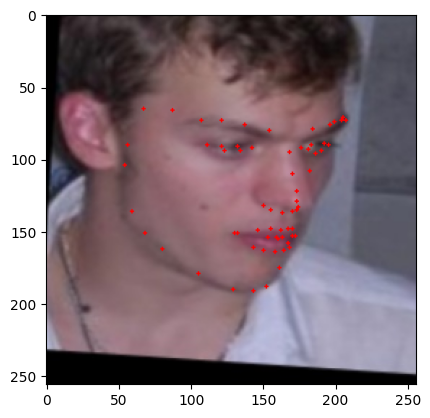

dataset3/dataset3/train/celeb/cropped/129896_132592.jpg


In [14]:
from matplotlib import pyplot as plt
import cv2
mapping_test_img = cv2.imread(mapping_test.Filepath[0])

mapping_test_x = []
mapping_test_y = []

for i in range(68):
    cv2.line(mapping_test_img,(int(mapping_test['x'+str(i)][0] * 256), int(mapping_test['y'+str(i)][0] * 256)),(int(mapping_test['x'+str(i)][0] * 256), int(mapping_test['y'+str(i)][0] * 256)),(0,0,255),2)


plt.imshow(cv2.cvtColor(mapping_test_img,cv2.COLOR_BGR2RGB))
plt.show()
print(mapping_test.Filepath[0])

# 모델생성

In [15]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU,DepthwiseConv2D,GlobalAveragePooling2D,Dense

def expansion_block(x,t,filters,block_id):
    prefix = 'block_{}_'.format(block_id)
    total_filters = t*filters
    x = Conv2D(total_filters,1,padding='same',use_bias=False, name =    prefix +'expand')(x)
    x = BatchNormalization(name=prefix +'expand_bn')(x)
    x = ReLU(6,name = prefix +'expand_relu')(x)
    return x
def depthwise_block(x,stride,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = DepthwiseConv2D(3,strides=(stride,stride),padding ='same', use_bias = False, name = prefix + 'depthwise_conv')(x)
    x = BatchNormalization(name=prefix +'dw_bn')(x)
    x = ReLU(6,name = prefix +'dw_relu')(x)
    return x
def projection_block(x,out_channels,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = Conv2D(filters=out_channels,kernel_size = 1,   padding='same',use_bias=False,name= prefix + 'compress')(x)
    x = BatchNormalization(name=prefix +'compress_bn')(x)
    return x

def Bottleneck(x,t,filters, out_channels,stride,block_id):
    y = expansion_block(x,t,filters,block_id)
    y = depthwise_block(y,stride,block_id)
    y = projection_block(y, out_channels,block_id)
    if y.shape[-1]==x.shape[-1]:
       y = tf.add(x,y)
    return y


In [16]:
def MobileNetV2(input_shape = (256,256,3), n_classes=1000):
    input = tf.keras.Input (input_shape)
    x = Conv2D(32,3,strides=(2,2),padding='same', use_bias=False)(input)
    x = BatchNormalization(name='conv1_bn')(x)
    x = ReLU(6, name='conv1_relu')(x)
    # 17 Bottlenecks
    x = depthwise_block(x,stride=1,block_id=1)
    x = projection_block(x, out_channels=16,block_id=1)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 2,block_id = 2)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 1,block_id = 3)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 2,block_id = 4)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 5)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 6)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 2,block_id = 7)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 8)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 9)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 10)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 11)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 12)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 13)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 2,block_id = 14)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 15)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 16)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 320, stride = 1,block_id = 17)
    x = Conv2D(filters = 1280,kernel_size = 1,padding='same',use_bias=False, name = 'last_conv')(x)
    x = BatchNormalization(name='last_bn')(x)
    x = ReLU(6,name='last_relu')(x)
    x = GlobalAveragePooling2D(name='global_average_pool')(x)
#    x = Dense(n_classes,activation='relu')(x)
    output = Dense(n_classes,activation='linear')(x)
    model = tf.keras.Model(input, output)
    return model

In [17]:
mobileNetModel = MobileNetV2(input_shape = (256,256,3),n_classes=136)

In [18]:
mobileNetModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 128, 128, 32  128         ['conv2d[0][0]']                 
                                )                                                             

# 모델학습

In [19]:
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
nadam_opt = tf.keras.optimizers.Nadam(learning_rate=0.000005)
rmsp_opt = tf.keras.optimizers.RMSprop(learning_rate=0.0005)
sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.003)



mobileNetModel.compile(
    optimizer=adam_opt,
    loss='mse'
)

In [79]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="Models/{epoch:03d}-{val_loss:.7f}.h5",
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_freq='epoch',
)

EScallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, mode='auto',restore_best_weights = True)



In [80]:
history = mobileNetModel.fit(
    train_images,
    validation_data=val_images,
    epochs=1000,
    callbacks=[model_checkpoint_callback]
)


mobileNetModel.save("Models/earlystoppedModel.keras")


Epoch 1/1000
  14/9865 [..............................] - ETA: 30:53 - loss: 9.1325e-05

KeyboardInterrupt: 

# 테스트

In [81]:
test_model = MobileNetV2(input_shape = (256,256,3),n_classes=136)
test_model.load_weights("Models/007-0.0001856.h5")
test_model.compile(
    optimizer='adam',
    loss='mse',
)

#testmodel = tf.keras.models.load_model("test.keras")

#testmodel.compile(
#    optimizer='adam',
#    loss='mse'
#)


In [82]:
testmodel = mobileNetModel
#testmodel.save("Models/MobileNet.keras")

In [113]:
random_one = DS.sample().reset_index(drop=True)

In [114]:
random_one.Filepath[0]

'dataset3/dataset3/train/300vw/cropped/146552_000194.jpg'

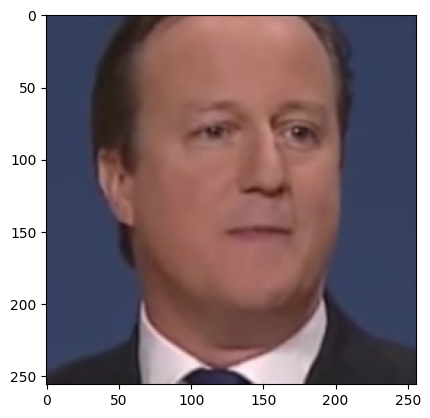

In [115]:
from tensorflow.keras.preprocessing import image

random_img = image.load_img(random_one.Filepath[0])
plt.imshow(random_img)






plt.show()

In [116]:
x = image.img_to_array(random_img)
x = np.expand_dims(x, axis=0)



#test_result = testmodel.predict(x)
test_result = mobileNetModel.predict(x)
#test_result = preTrainedModel.predict(x)

1/1 [==============================] - 0s 15ms/step


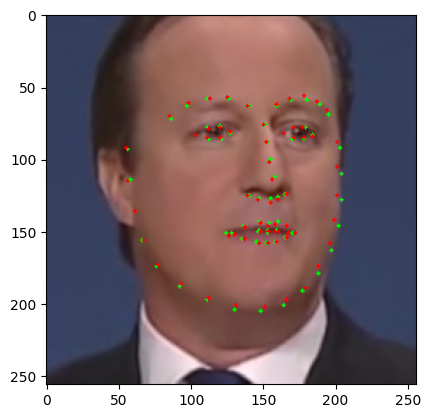

In [117]:
visualizer = cv2.imread(random_one.Filepath[0])

for i in range(68):
    cv2.line(visualizer,(int(random_one['x'+str(i)][0] * 256), int(random_one['y'+str(i)][0] * 256)),(int(random_one['x'+str(i)][0] * 256), int(random_one['y'+str(i)][0] * 256)),(0,255,0),2)
    cv2.line(visualizer,(int(test_result[0][i*2] * 256),int(test_result[0][i*2+1] * 256)),(int(test_result[0][i*2] * 256),int(test_result[0][i*2+1] * 256)),(0,0,255),2)

plt.imshow(cv2.cvtColor(visualizer,cv2.COLOR_BGR2RGB))
plt.show()



# 재학습

In [46]:
preTrainedModel = tf.keras.models.load_model("Models/earlystoppedModel.h5")



In [48]:
preTrainedModel.compile(
    optimizer=nadam_opt,
    loss='mse',
    metrics=['accuracy']
)
#EScallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)



In [49]:
history = preTrainedModel.fit(
    train_images,
    validation_data=val_images,
    epochs=20
)

preTrainedModel.save("Models/earlystoppedModel_plus.h5")

Epoch 1/20
135/135 [==============================] - 38s 229ms/step - loss: 0.1534 - accuracy: 0.4149 - val_loss: 0.0546 - val_accuracy: 0.0596
Epoch 2/20
135/135 [==============================] - 30s 223ms/step - loss: 0.0062 - accuracy: 0.7975 - val_loss: 0.0174 - val_accuracy: 0.8194
Epoch 3/20
135/135 [==============================] - 30s 221ms/step - loss: 0.0060 - accuracy: 0.8085 - val_loss: 0.0062 - val_accuracy: 0.8194
Epoch 4/20
135/135 [==============================] - 30s 222ms/step - loss: 0.0059 - accuracy: 0.8073 - val_loss: 0.0058 - val_accuracy: 0.8194
Epoch 5/20
135/135 [==============================] - 30s 225ms/step - loss: 0.0059 - accuracy: 0.8085 - val_loss: 0.0059 - val_accuracy: 0.8194
Epoch 6/20
135/135 [==============================] - 30s 224ms/step - loss: 0.0058 - accuracy: 0.8085 - val_loss: 0.0058 - val_accuracy: 0.8194
Epoch 7/20
135/135 [==============================] - 31s 227ms/step - loss: 0.0058 - accuracy: 0.8085 - val_loss: 0.0058 - val_ac

KeyboardInterrupt: 

# tflite 전환

In [141]:
#mobileNetModel = tf.keras.models.load_model("Models/Ver3.keras")

converter = tf.lite.TFLiteConverter.from_keras_model(mobileNetModel)
tflite_model = converter.convert()

# Save the model.
with open('Models/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\67160_~1\AppData\Local\Temp\tmp8yb08ow6\assets


INFO:tensorflow:Assets written to: C:\Users\67160_~1\AppData\Local\Temp\tmp8yb08ow6\assets


In [142]:
interpreter = tf.lite.Interpreter(model_path="Models/model.tflite")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.allocate_tensors()

# input details
print(input_details)
# output details
print(output_details)


[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'shape_signature': array([ -1, 224, 224,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 171, 'shape': array([  1, 136]), 'shape_signature': array([ -1, 136]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [143]:
interpreter.set_tensor(input_details[0]['index'], x)





In [144]:
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

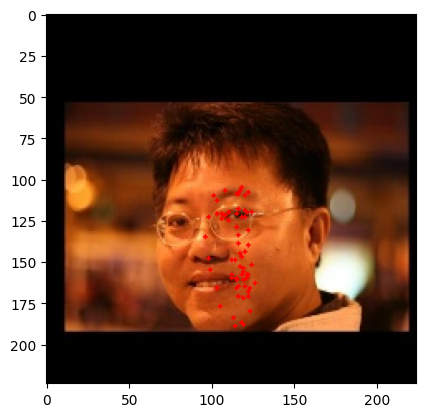

In [145]:
visualizer = cv2.imread(random_one.Filepath[0])

for i in range(68):
    #cv2.line(visualizer,(int(test_result[0][i*2] * 224),int(test_result[0][i*2+1] * 224)),(int(test_result[0][i*2] * 224),int(test_result[0][i*2+1] * 224)),(255,0,0),2)
    #cv2.line(visualizer,(int(random_one['x'+str(i)][0] * 224), int(random_one['y'+str(i)][0] * 224)),(int(random_one['x'+str(i)][0] * 224), int(random_one['y'+str(i)][0] * 224)),(0,255,0),2)
    cv2.line(visualizer,(int(output_data[0][i*2] * 224),int(output_data[0][i*2+1] * 224)),(int(output_data[0][i*2] * 224),int(output_data[0][i*2+1] * 224)),(0,0,255),2)

plt.imshow(cv2.cvtColor(visualizer,cv2.COLOR_BGR2RGB))
plt.show()

In [252]:
preTrainedModel.save("Models/earlystoppedModel_plus.h5")

ValueError: Unable to synchronously create dataset (name already exists)